# Importing the Data

In [2]:
import problem
import utils
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = problem.get_train_data(path="../")
X_train: pd.DataFrame = data[0]
y_train: pd.DataFrame = data[1]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 509834 entries, 1997-10-01 00:00:00 to 2007-12-31 23:50:00
Data columns (total 33 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   B           509834 non-null  float32
 1   Bx          509834 non-null  float32
 2   Bx_rms      509834 non-null  float32
 3   By          509834 non-null  float32
 4   By_rms      509834 non-null  float32
 5   Bz          509834 non-null  float32
 6   Bz_rms      509834 non-null  float32
 7   Na_nl       509834 non-null  float32
 8   Np          509834 non-null  float32
 9   Np_nl       509834 non-null  float32
 10  Range F 0   509834 non-null  float32
 11  Range F 1   509834 non-null  float32
 12  Range F 10  509834 non-null  float32
 13  Range F 11  509834 non-null  float32
 14  Range F 12  509834 non-null  float32
 15  Range F 13  509834 non-null  float32
 16  Range F 14  509834 non-null  float32
 17  Range F 2   509834 non-null  float32
 18  Range F 3 

# Visualizing the data

In [4]:
def get_solarstorms(X):
    filter_solarstorm = y_train == 1
    filter_classic = y_train == 0
    X_solarstorm, y_solarstorm = X[filter_solarstorm], y_train[filter_solarstorm]
    X_classic, y_classic = X[filter_classic], y_train[filter_classic]

    return X_classic, y_classic, X_solarstorm, y_solarstorm

X_classic, y_classic, X_solarstorm, y_solarstorm = get_solarstorms(X_train)

In [5]:
def describe(X, columns: list):
    plt.figure()
    X[columns].plot(kind="kde")
    plt.figure()
    X.boxplot(column=columns)
    print(X[columns].describe())
    plt.show()

X_train.describe()

,B,Bx,Bx_rms,By,By_rms,Bz,Bz_rms,Na_nl,Np,Np_nl,...,Range F 8,Range F 9,V,Vth,Vx,Vy,Vz,Beta,Pdyn,RmsBob
count,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,...,5.098340e+05,5.098340e+05,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,5.098340e+05,5.098340e+05,509834.000000
mean,6.618241,-0.116903,0.349193,0.175771,0.382512,0.048810,0.441394,0.241324,8.514418,6.261351,...,1.408352e+09,2.496849e+09,446.682709,39.515217,-442.086670,-2.459462,-2.569139,7.562124e-01,2.195595e-15,0.117950
std,6.588211,5.086633,0.395332,5.073081,0.421456,5.693224,0.481742,0.313865,1180.652832,45.900372,...,1.384293e+09,2.492037e+09,119.224915,20.504719,110.814835,49.024765,39.597439,1.997131e+01,5.730285e-15,0.096591
min,0.265439,-627.767090,0.021706,-235.912567,0.020630,-64.567726,0.017230,-8.387888,0.028063,0.038368,...,0.000000e+00,0.000000e+00,27.204723,4.499917,-1510.373169,-9046.032227,-3448.573730,2.245404e-07,5.024297e-20,0.001278
25%,4.274620,-3.032881,0.138021,-2.865887,0.150889,-1.817907,0.177674,0.092080,3.299438,2.891332,...,6.702708e+08,1.178271e+09,363.626076,25.233902,-504.544746,-16.727910,-14.483639,2.436706e-01,1.116204e-15,0.057407
50%,5.659535,-0.176959,0.253549,0.216375,0.274668,-0.004539,0.321382,0.158681,5.156705,4.616244,...,1.076248e+09,1.954434e+09,422.142212,35.519648,-419.516281,-4.281143,-2.402109,4.799992e-01,1.596067e-15,0.096055
75%,7.691845,2.842238,0.437566,3.102099,0.481610,1.772896,0.554418,0.278809,8.260030,7.598074,...,1.717871e+09,3.013703e+09,508.262398,49.010423,-361.513641,10.149143,8.786250,8.278563e-01,2.388373e-15,0.151583
max,1419.378296,467.822205,17.482304,571.322571,21.112930,1137.248291,24.211935,13.201321,843014.062500,31596.484375,...,5.740399e+10,7.634294e+10,10663.779297,816.426636,3732.478271,6255.307129,7029.354980,1.421069e+04,2.069267e-12,7.750694


In [ ]:
describe(X_train, ["B"])

In [ ]:
describe(X_solarstorm, ["B"])

(<Figure size 1500x400 with 2 Axes>,
 array([<AxesSubplot: ylabel='Beta'>, <AxesSubplot: ylabel='Pdyn'>],
       dtype=object))

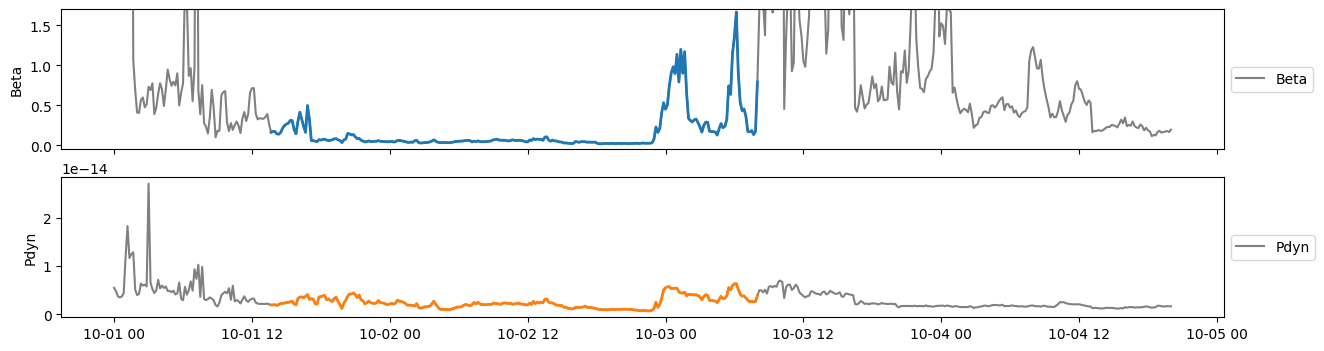

In [5]:
from problem import turn_prediction_to_event_list

events = turn_prediction_to_event_list(y_train)
def plot_event(event_index, data, features, maxRange=None, delta=36, size=4):
    global events

    start = pd.to_datetime(events[event_index].begin)
    end = pd.to_datetime(events[event_index].end)
    subset = data[(start - pd.Timedelta(hours=delta)):(end + pd.Timedelta(hours=delta))]
    area_of_interest = data[start:end]

    fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(15,size), sharex=True)

    def plot(i, ax):
        ax.plot(subset.index, subset[features[i]], color='gray', linewidth=1.5)
        ax.plot(area_of_interest.index, area_of_interest[features[i]], color=f'C{i}', linewidth=2)
        ax.legend([features[i]], loc='center left', bbox_to_anchor=(1, 0.5))
        ax.set_ylabel(features[i])
        if maxRange is not None and i < len(maxRange):
            ax.set_ylim(maxRange[i][0], maxRange[i][1])

    if len(features) <= 1:
        plot(0, axes)
        return fig, axes

    i = 0
    for ax in axes:
        plot(i, ax)
        i += 1

    # add vertical lines
    for ax in axes:
        ax.xaxis.grid(True, which="minor")

    return fig, axes

plot_event(
    0,
    X_train,
    ['Beta', 'Pdyn'],
    maxRange=[[-0.05, 1.7]],
    size=4
)

In [6]:
from tsfresh import extract_features

extracted_features = extract_features(X_train.iloc[0:500], column_id="Beta")

Feature Extraction: 100%|██████████| 20/20 [01:40<00:00,  5.01s/it]


In [9]:
from tsfresh.utilities.dataframe_functions import impute
from tsfresh import select_features

extracted_features = impute(extracted_features)
extracted_features = select_features(extracted_features, y_train.values())
extracted_features

TypeError: 'numpy.ndarray' object is not callable

In [36]:
import sklearn.preprocessing as preprocessing
from sklearn.pipeline import make_pipeline

def get_preprocessing():
    return preprocessing.QuantileTransformer(n_quantiles=100, output_distribution='normal', random_state=1).set_output(transform='pandas'), \
           preprocessing.RobustScaler().set_output(transform='pandas'), \
           preprocessing.MinMaxScaler().set_output(transform='pandas')

def pipeline_preprocessing(X):
    X_df = X.copy()
    pipe = make_pipeline(*get_preprocessing())
    pipe.fit(X_df)
    return pipe.transform(X_df)

In [37]:
X_train_preprocessed = pipeline_preprocessing(X_train)
X_classic_preprocessed, _, X_solarstorm_preprocessed, _ = get_solarstorms(X_train_preprocessed)
X_train_preprocessed.describe()

,B,Bx,Bx_rms,By,By_rms,Bz,Bz_rms,Na_nl,Np,Np_nl,...,Range F 8,Range F 9,V,Vth,Vx,Vy,Vz,Beta,Pdyn,RmsBob
count,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,...,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.0,509834.000000
mean,0.499663,0.498551,0.499340,0.499619,0.499076,0.498850,0.498833,0.502738,0.498944,0.500213,...,0.498140,0.498347,0.499436,0.499130,0.500813,0.500965,0.500977,0.499179,0.0,0.499175
std,0.094854,0.095795,0.094026,0.094907,0.094645,0.093990,0.095653,0.094706,0.095783,0.095047,...,0.096535,0.097974,0.095200,0.094618,0.095622,0.095532,0.095462,0.094767,0.0,0.096277
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.434698,0.432103,0.436219,0.434936,0.435248,0.435733,0.435352,0.437062,0.433380,0.435530,...,0.434252,0.435675,0.433892,0.434926,0.435747,0.435319,0.435217,0.436582,0.0,0.434017
50%,0.500044,0.499901,0.499053,0.499852,0.499243,0.498754,0.500078,0.501679,0.498095,0.500012,...,0.498114,0.499637,0.499349,0.499197,0.500453,0.500220,0.500413,0.499170,0.0,0.499123
75%,0.564575,0.564457,0.562128,0.565566,0.564782,0.562709,0.563197,0.566972,0.564762,0.565464,...,0.563530,0.562996,0.564240,0.564090,0.565551,0.566398,0.565789,0.563725,0.0,0.566099
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [ ]:
describe(X_train_preprocessed, ["B"])

In [ ]:
describe(X_solarstorm_preprocessed, columns=["B"])

(<Figure size 1500x600 with 2 Axes>,
 array([<AxesSubplot: ylabel='Beta'>, <AxesSubplot: ylabel='Pdyn'>],
       dtype=object))

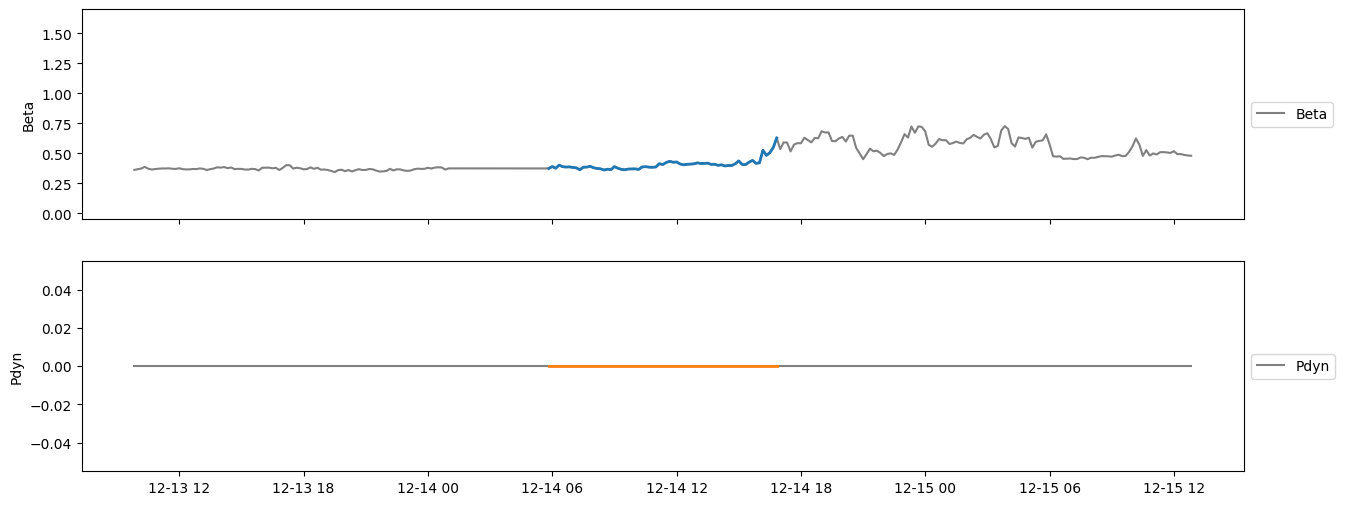

In [57]:
plot_event(
    10,
    X_train_preprocessed,
    ['Beta','Pdyn'],
    maxRange=[[-0.05, 1.7]],
    size=6,
    delta=20,
)

# Feature engineering

In [17]:
fe = utils.FeatureExtractor()
X_transformed = fe.transform(X_train)
X_transformed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 509834 entries, 1997-10-01 00:00:00 to 2007-12-31 23:50:00
Data columns (total 98 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   B                     509834 non-null  float32
 1   Bx                    509834 non-null  float32
 2   Bx_rms                509834 non-null  float32
 3   By                    509834 non-null  float32
 4   By_rms                509834 non-null  float32
 5   Bz                    509834 non-null  float32
 6   Bz_rms                509834 non-null  float32
 7   Na_nl                 509834 non-null  float32
 8   Np                    509834 non-null  float32
 9   Np_nl                 509834 non-null  float32
 10  Range F 0             509834 non-null  float32
 11  Range F 1             509834 non-null  float32
 12  Range F 10            509834 non-null  float32
 13  Range F 11            509834 non-null  float32
 14  Range F 12        

In [18]:
X_classic_transformed, _, X_solarstorm_transformed, _ = get_solarstorms(X_transformed)

In [19]:
description_classic = X_classic_transformed.describe()
description_solarstorm = X_solarstorm_transformed.describe()

In [ ]:
description_classic

In [ ]:
description_solarstorm

In [20]:
variations = description_classic.to_numpy().astype(np.float32) - description_solarstorm.to_numpy().astype(np.float32)
variations = pd.DataFrame(columns=description_solarstorm.columns, index=description_solarstorm.index, data=variations)
variations

,B,Bx,Bx_rms,By,By_rms,Bz,Bz_rms,Na_nl,Np,Np_nl,...,Vx_10,Vx_20,Range F 9_-1,Range F 9_-5,Range F 9_-10,Range F 9_-20,Range F 9_1,Range F 9_5,Range F 9_10,Range F 9_20
count,392704.000000,392704.000000,392704.000000,392704.000000,392704.000000,392704.000000,392704.000000,392704.000000,392704.000000,392704.000000,...,392704.000000,392704.000000,3.927040e+05,3.927040e+05,3.927040e+05,3.927040e+05,3.927040e+05,3.927040e+05,3.927040e+05,3.927040e+05
mean,-3.057361,-0.232439,0.112295,-0.269400,0.125389,0.122151,0.149909,-0.023290,2.029739,0.326796,...,2.306061,0.629547,-7.580685e+08,-8.164511e+08,-9.016338e+08,-1.036292e+09,-7.453914e+08,-7.525522e+08,-7.682739e+08,-7.859185e+08
std,1.830287,-0.423850,0.188017,-1.836977,0.189395,-0.206710,0.220394,-0.043376,1247.544312,43.424297,...,2.504608,4.518074,-6.623534e+08,-7.940047e+08,-9.872356e+08,-1.184910e+09,-6.316470e+08,-6.527012e+08,-6.726892e+08,-7.117834e+08
min,-0.767691,-584.052490,-0.000639,-201.353729,-0.003939,-13.656357,-0.002867,-8.223897,0.000000,-0.021535,...,-234.667236,-234.667236,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-2.103758,0.828900,0.034917,1.382843,0.042721,1.325712,0.055305,0.017446,0.492290,0.461535,...,-14.787079,-16.983246,-1.157476e+08,-1.229603e+08,-1.334894e+08,-1.598066e+08,-1.152641e+08,-1.175261e+08,-1.226290e+08,-1.341690e+08
50%,-2.844242,-0.525873,0.078178,-0.136691,0.088580,-0.084820,0.108856,-0.000516,0.205283,0.111475,...,-1.426300,-1.940338,-4.189545e+08,-4.439585e+08,-4.759805e+08,-5.340749e+08,-4.117951e+08,-4.101432e+08,-4.125832e+08,-4.086938e+08
75%,-3.718900,-1.379950,0.136706,-1.806890,0.157267,-1.222395,0.182100,-0.037381,-0.145802,-0.094429,...,10.490173,10.125275,-1.150624e+09,-1.211379e+09,-1.290169e+09,-1.447267e+09,-1.127973e+09,-1.130528e+09,-1.143999e+09,-1.128715e+09
max,1362.902222,435.402130,10.657776,517.406128,15.844015,1098.252197,17.270262,3.382982,842664.375000,31505.455078,...,3448.286133,3448.286133,2.406348e+10,1.463022e+10,-9.037423e+09,-9.037423e+09,2.406348e+10,2.406348e+10,2.406348e+10,2.580480e+10


In [ ]:
import tspymfe.tsmfe as tsmfe

extractor = tsmfe.TSMFE()
extractor.fit(X_transformed["Beta"].to_numpy()[:10000])
res = extractor.extract()

# Training classifier

## Memory Classifier

In [ ]:
from markov_model import MemoryClassifier
from sklearn.ensemble import RandomForestClassifier

memory = 12
characteristic_storm_duration = 50
model = MemoryClassifier(
        memory=memory,
        classifier=RandomForestClassifier(n_estimators=50, max_depth=9, class_weight={0: 1, 1: 1.5}),
        characteristic_storm_duration=50,
    )

model.fit(X_transformed, y_train)

In [ ]:
classifier = model.classifier
features = pd.DataFrame(index=list(X_transformed.keys()) + [f"y_-{t}" for t in range(1, memory+1)], data=classifier.feature_importances_, columns=["importance"])
features.sort_values(by='importance', ascending=False)

## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=50, class_weight='balanced')
model.fit(X_transformed, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=50)

In [22]:
features = pd.DataFrame(index=list(X_transformed.keys()), data=model.feature_importances_, columns=["importance"])
features.sort_values(by='importance', ascending=False)

,importance
Beta_30min_max,0.062090
Beta,0.056735
Beta_-10,0.056090
Beta_-5,0.052008
Beta_1,0.048138
...,...
By_rms,0.002958
Range F 1,0.002951
Range F 0,0.002512
Pdyn,0.000000


In [ ]:
X_solarstorm.shape[0]/X_train.shape[0]